# Testing types of statistical analysis

Using dataset im.db to work with duration of movies, ratings and number of votes

In [2]:
# Import libraries
import pandas as pd
import sqlite3
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()
import seaborn as sbn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
# Calling runtime_minutes, numvotes, averagerating columns with more than 40000 number of votes
allruntime= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null  AND mr.numvotes > 40000
  ORDER BY mr.numvotes, mb.runtime_minutes DESC
  ;
""", conn)
#
allruntime


,runtime_minutes,numvotes,averagerating
0,114.0,40009,2.7
1,113.0,40213,5.7
2,108.0,40229,6.7
3,97.0,40250,6.3
4,111.0,40290,7.0
...,...,...,...
1238,143.0,1183655,8.1
1239,165.0,1211405,8.4
1240,169.0,1299334,8.6
1241,164.0,1387769,8.4


# Find out if there is a correlation

In [4]:
# New variables tu runtime_minutes and numvotes
run_time=list(allruntime["runtime_minutes"])
votes=list(allruntime["numvotes"])


In [5]:
# We want to know if number of votes and duration of movie have a correlation
correlation = np.corrcoef(run_time,votes)
correlation[0][1]

0.3236165839916023

The correlation is poor

# Mean and standar desviation of population for a Z-test

In [9]:
rmean=sum(run_time)/len(run_time)
rstandar=np.std(run_time)
print("Standar_desviation:", rstandar, "Mean:", rmean)

Standar_desviation: 18.945068833245923 Mean: 112.4167337087691


# Sample

In [12]:
# num of votes are 900000 Calling runtime_minutes, numvotes, averagerating columns with more than 900000 number of votes
allruntime= pd.read_sql("""
SELECT mb.runtime_minutes, mr.numvotes, mr.averagerating
  FROM movie_basics mb
  JOIN movie_ratings mr USING(movie_id) 
  WHERE mb.runtime_minutes AND mb.genres IS NOT Null AND mr.numvotes > 900000
  ORDER BY mr.numvotes, mb.runtime_minutes DESC
  ;
""", conn)
#
allruntime

,runtime_minutes,numvotes,averagerating
0,121.0,948394,8.1
1,138.0,1005960,8.1
2,180.0,1035358,8.2
3,143.0,1183655,8.1
4,165.0,1211405,8.4
5,169.0,1299334,8.6
6,164.0,1387769,8.4
7,148.0,1841066,8.8


# Mean sample

In [19]:
# Mean
run_time_sample=list(allruntime["runtime_minutes"])
rmean_sample=sum(run_time_sample)/len(run_time_sample)
rmean_sample

153.5

In [14]:
# Standar desviation of sample
vm=sum(votes)/11
vst=np.std(votes)
vm

18400446.545454547

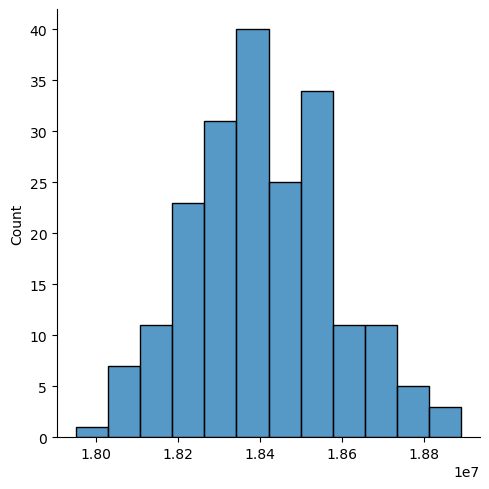

In [18]:
# Finding if has normal distribution
s1 = np.random.normal(vm, vst, 202)
sbn.displot(s1);